In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer


In [10]:
import pandas as pd

# Load the train and test datasets using your provided file path
train_data = pd.read_csv(r"C:\Users\jayan\Downloads\train.csv", encoding='ISO-8859-1')
test_data = pd.read_csv(r"C:\Users\jayan\Downloads\test.csv", encoding='ISO-8859-1')

# Inspect the first few rows of the data
print(train_data.head())
print(test_data.head())


       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan          38928346         652860.0    

In [11]:
# Check for missing values in the train and test datasets
train_missing_values = train_data.isnull().sum()
test_missing_values = test_data.isnull().sum()

train_missing_values, test_missing_values


(textID              0
 text                1
 selected_text       1
 sentiment           0
 Time of Tweet       0
 Age of User         0
 Country             0
 Population -2020    0
 Land Area (Km²)     0
 Density (P/Km²)     0
 dtype: int64,
 textID              1281
 text                1281
 sentiment           1281
 Time of Tweet       1281
 Age of User         1281
 Country             1281
 Population -2020    1281
 Land Area (Km²)     1281
 Density (P/Km²)     1281
 dtype: int64)

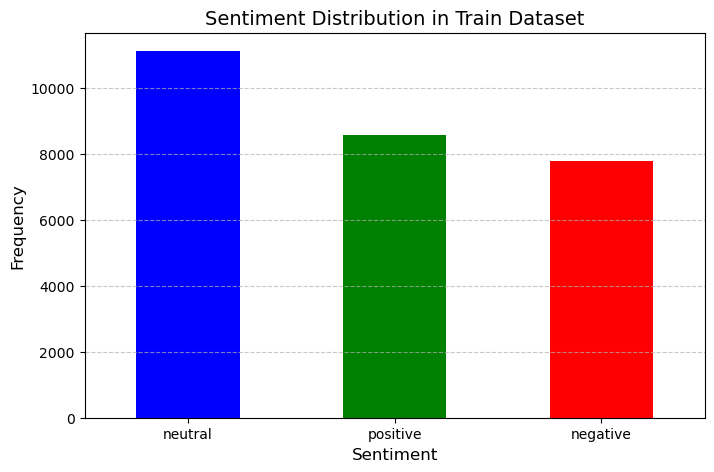

In [12]:
# Sentiment distribution in the train dataset
sentiment_distribution = train_data['sentiment'].value_counts()

# Visualization of sentiment distribution in the train dataset
plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title("Sentiment Distribution in Train Dataset", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [14]:
from sklearn.impute import SimpleImputer

# Drop the 'selected_text' column from the training dataset before imputation
columns_to_impute = [col for col in train_data.columns if col != "selected_text"]

# Create copies of the datasets
train_data_imputed = train_data.copy()
test_data_imputed = test_data.copy()

# Fit the imputer only on the columns present in both datasets
imputer = SimpleImputer(strategy='most_frequent')
train_data_imputed[columns_to_impute] = imputer.fit_transform(train_data_imputed[columns_to_impute])
test_data_imputed = pd.DataFrame(imputer.transform(test_data_imputed), columns=test_data.columns)


In [15]:
# Preprocess the text data: lowercasing, removing special characters, etc.
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply the cleaning function to the text columns
train_data_imputed['text'] = train_data_imputed['text'].apply(clean_text)
test_data_imputed['text'] = test_data_imputed['text'].apply(clean_text)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data_imputed['text'])
X_test = vectorizer.transform(test_data_imputed['text'])

# Prepare the target variable
y_train = train_data_imputed['sentiment']
y_test = test_data_imputed['sentiment']


In [16]:
# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.5144340602284527
              precision    recall  f1-score   support

    negative       0.29      0.63      0.40      1001
     neutral       0.63      0.40      0.49      2711
    positive       0.80      0.70      0.75      1103

    accuracy                           0.51      4815
   macro avg       0.58      0.57      0.54      4815
weighted avg       0.60      0.51      0.53      4815



In [17]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.5005192107995846
              precision    recall  f1-score   support

    negative       0.27      0.56      0.36      1001
     neutral       0.61      0.40      0.49      2711
    positive       0.78      0.69      0.73      1103

    accuracy                           0.50      4815
   macro avg       0.55      0.55      0.53      4815
weighted avg       0.58      0.50      0.52      4815



Logistic Regression Accuracy: 0.5144340602284527
Random Forest Accuracy: 0.5005192107995846


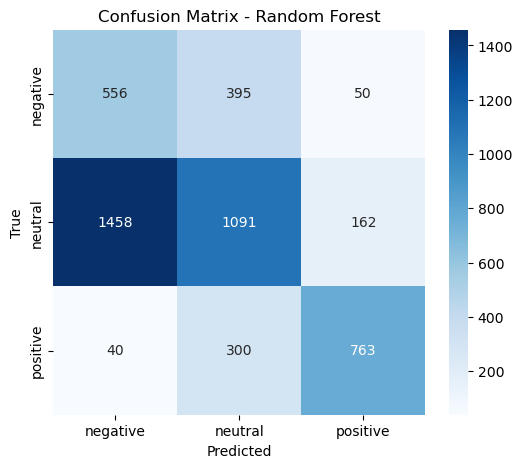

In [18]:
# Print the accuracy of both models
print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [19]:
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy}")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.5227414330218069
              precision    recall  f1-score   support

    negative       0.30      0.64      0.41      1001
     neutral       0.64      0.41      0.50      2711
    positive       0.84      0.70      0.76      1103

    accuracy                           0.52      4815
   macro avg       0.59      0.58      0.56      4815
weighted avg       0.61      0.52      0.54      4815



In [20]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Encode the target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Build a simple neural network
nn_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test_encoded)
print(f"Neural Network Accuracy: {nn_accuracy}")


c:\Users\jayan\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.5448 - loss: 0.9175 - val_accuracy: 0.6909 - val_loss: 0.7031
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.7652 - loss: 0.5783 - val_accuracy: 0.6995 - val_loss: 0.7106
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.8386 - loss: 0.4304 - val_accuracy: 0.6862 - val_loss: 0.7817
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9052 - loss: 0.2731 - val_accuracy: 0.6796 - val_loss: 0.9134
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9472 - loss: 0.1626 - val_accuracy: 0.6789 - val_loss: 1.1030
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9691 - loss: 0.0938 - val_accuracy: 0.6693 - val_loss: 1.2644
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9754 - loss: 0.0766 - val_accuracy: 0.6738 - val_loss: 1.3235
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9814 - loss: 0.0559 - 

In [21]:
from sklearn.naive_bayes import MultinomialNB

# Train a Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_nb = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7445482866043613
              precision    recall  f1-score   support

    negative       0.76      0.51      0.61      1001
     neutral       0.73      0.90      0.81      2711
    positive       0.77      0.59      0.67      1103

    accuracy                           0.74      4815
   macro avg       0.76      0.66      0.69      4815
weighted avg       0.75      0.74      0.73      4815



ModuleNotFoundError: No module named 'xgboost'